# Chapter 6 Temporal-Difference Learning

## 6.2 Advantages of TD Prediction Methods

### Example 6.2 Random Walk
 http://localhost:8888/notebooks/reinforcement2e/chapter6/chapter6_randomwalk_sjyoon.ipynb

In [128]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

class Plot():
    def __init__(self, nrows, ncols, figsize):
        self.fig_idx = 0
        self.len_axes = nrows*ncols
        path = '/Library/Fonts/NanumGothicBold.otf'
        font_name = fm.FontProperties(fname=path, size=50).get_name()
#         print(font_name)
        plt.rc('font', family=font_name)
        
        _, self.axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
        plt.subplots_adjust(wspace=0.1, hspace=0.2)
        if self.len_axes != 1:
            self.axes = self.axes.flatten()

    def get_axes(self, idx):
        if self.len_axes != 1: 
            ax = self.axes[self.fig_idx]
        else:
            ax = self.axes
        return ax
    
    def draw_mline_begin(self, labels):       
        ax = self.get_axes(self.fig_idx)
        
        ax.set_xlabel(labels[0], fontsize=30)
        ax.set_ylabel(labels[1], fontsize=30)
        ax.set_title(labels[2], fontsize=30)
        
        return ax
        
    def draw_mline(self, ax, pos, data, label, linestyle='solid'):
        lines = ax.plot(pos, data, label=label, linestyle=linestyle)
        
        pivot_idx = random.randint(0, (len(data)*2)//3)
        x_pos = pos[pivot_idx]
        y_pos = data[pivot_idx]
        ax.text(x_pos, y_pos, label, color = lines[0].get_color(), size=18)

    def draw_mline_end(self):       
        self.fig_idx += 1

    def draw_bar(self, pos, data, labels):
        ax = self.get_axes(self.fig_idx)
        ax.bar(pos, data)
        
        ax.set_xlabel(labels[0], fontsize=30)
        ax.set_ylabel(labels[1], fontsize=30)
        ax.set_title(labels[2], fontsize=30)
        self.fig_idx += 1
        
    def show(self):
        plt.show()

0.99% processing...


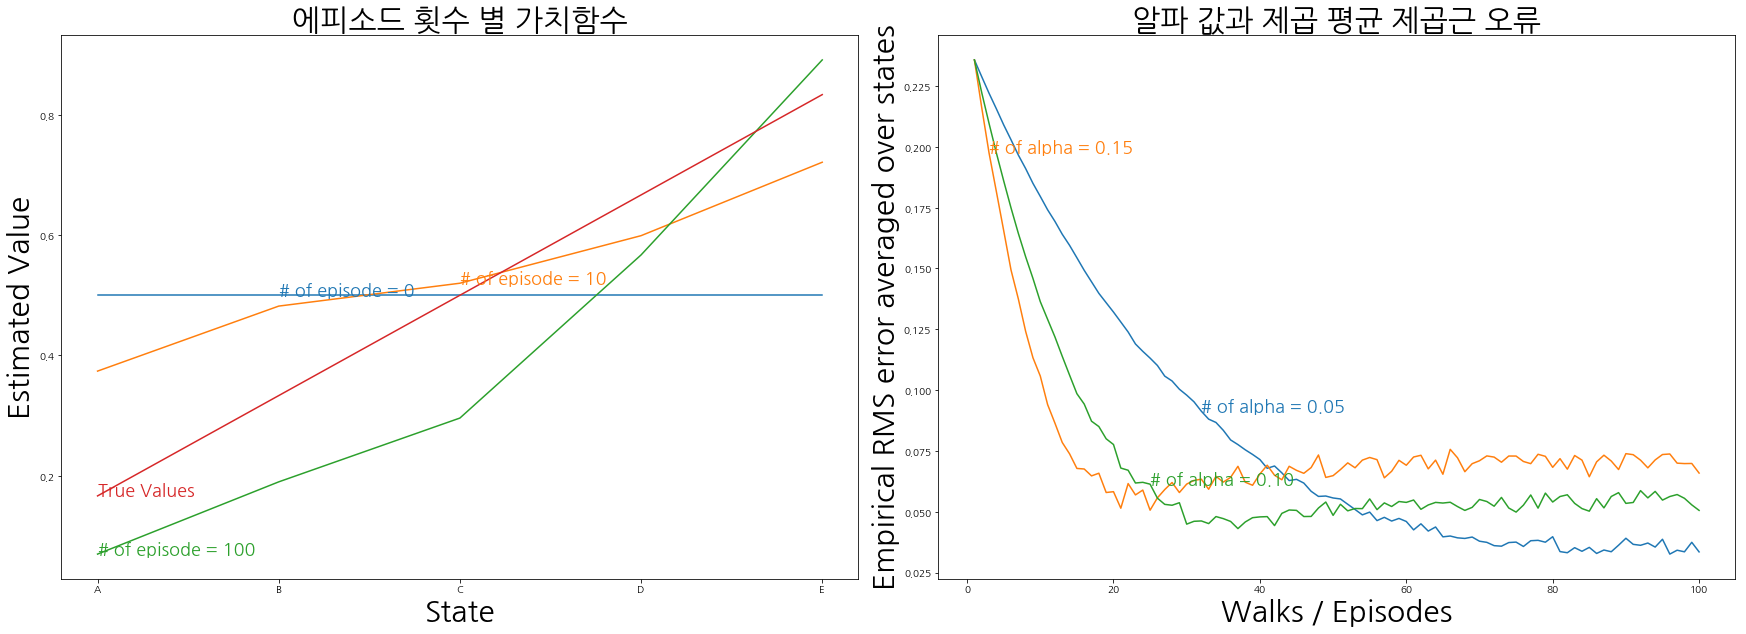

In [224]:
# Tabular TD(0) for estimating Vpi

#!/usr/bin/env python
# -*- coding:utf-8 -*-
import sys
import math
import numpy as np
from numpy import random
from IPython.display import display, clear_output

gamma = 1.0
initial_state = 3
true_value = [0, 1/6, 2/6, 3/6, 4/6, 5/6, 0]

# randomly return -1 or +1
def get_action():
    low, high, size =0, 2, 1
    x = random.randint(low, high, size) # (low,high]
    return -1 if x == 0 else 1

# return reward and state
def step(state, action):
    reward = 0
    state += action
    if state == 6: reward = 1
    return reward, state

def update_values(values, alpha, reward, state, next_state):
    global gamma
    values[state] = round(values[state] + alpha * (reward + gamma * values[next_state] - values[state]), 3)
    return values

# [0][1][2][3][4][5][6]
#  X  A  B  C  D  E  X
def temporal_difference(num_of_episodes, alpha):
    values = np.full(7, 0.5)
    values[0] = 0.0
    values[6] = 0.0
    for episode in range(num_of_episodes):
        state = initial_state
        while state in [1,2,3,4,5]:
            action = get_action()
            reward, next_state = step(state, action)
            values = update_values(values, alpha, reward, state, next_state)
            state = next_state
    return values

def draw_td_value_plot(plot, series_of_episodes):
    global true_value
    alpha= 0.1
    labels = ['State', 'Estimated Value', '에피소드 횟수 별 가치함수']
    state_list = ['LM', 'A', 'B', 'C', 'D', 'E', 'RM']
    ax = plot.draw_mline_begin(labels)   

    for num_of_episode in series_of_episodes:
        values = temporal_difference(num_of_episode, alpha)
        rms = empirical_rms_error(true_value, values)
        label = "# of episode = %d" % (num_of_episode)
        plot.draw_mline(ax, state_list[1:-1], values[1:-1], label)
        
    label = "True Values"
    plot.draw_mline(ax, state_list[1:-1], true_value[1:-1], label)
    plot.draw_mline_end()
    
def empirical_rms_error(true_value, values):
    error = (true_value - values)
    rms = np.sqrt(np.mean(error**2))
    return rms
    
def draw_rms_error_plot(plot, series_of_alphas):
    global true_value
    labels = ['Walks / Episodes', 'Empirical RMS error averaged over states', '알파 값과 제곱 평균 제곱근 오류']
    num_of_runs = 100
    num_of_episodes = 100
    episode_list = [x+1 for x in range(num_of_episodes)]
    ax = plot.draw_mline_begin(labels)
    
    total = len(series_of_alphas) * num_of_runs
    current = 0
    for alpha in series_of_alphas:
        avg_rms_error = np.zeros(num_episode)
        current += 1
        for run in range(num_of_runs):
            list_of_rms_error_means = np.zeros(num_of_episodes)
            clear_output(wait=True)
            print('{}% completed - alpha:{}, run:{}'.format(round((current*run)/total, 3) * 100.0, alpha, run)) 
            for num_of_episode in range(num_of_episodes):
                values = temporal_difference(num_of_episode, alpha)
                rms = empirical_rms_error(true_value[1:-1], values[1:-1])
                list_of_rms_error_means[num_of_episode] = rms
            label = "# of alpha = %0.2f" % (alpha)
            avg_rms_error += list_of_rms_error_means
        avg_rms_error /= num_of_runs
        plot.draw_mline(ax, episode_list, avg_rms_error, label)
    
plot = Plot(nrows=1, ncols=2, figsize=(25,10))
draw_td_value_plot(plot, [0, 10, 100, 1000])
draw_rms_error_plot(plot, [0.05, 0.15, 0.1]) # , 0.2, 0.5, 0.9, 1.0])

In [130]:
for x in range(1, 6):
    sys.stdout.write('{}, '.format(round(x/6.0,2)))
    
episode_list = [x+1 for x in range(100)]
print(episode_list)

0.17, 0.33, 0.5, 0.67, 0.83, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [226]:
from random import uniform
import time
from IPython.display import display, clear_output

def black_box():
    i = 1
    while True:
        clear_output(wait=True)
        display('Iteration '+str(i)+' Score: '+str(uniform(0, 1)))
        time.sleep(1)
        i += 1
        if i > 10: break

black_box()

'Iteration 10 Score: 0.7870875841583304'

## 6.4 Sarsa: On-policy TD Controkl

## 6.5 Q-learning: Off-policy TD Control

### Example 6.6: Cliff Walking